
> Fabio Montello (1834411), Francesco Russo (1449025), Michele Cernigliaro (1869097)

In this report we proceed to answer as requested the questions 1d, 1e, 3c and 4b. For each point we are going to write a brief description using figures and formulas whenever needed.

# Question 1d

**The effect of applying a filter can be studied by observing its impulse response. Execute the code in
filter.py to create a test image in which only the central pixel has a non-zero value:**

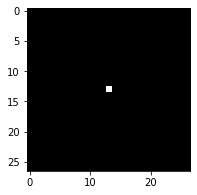

In [1]:
import sys
sys.path.insert(1, './Filtering')
sys.path.insert(1, './Identification')

import pandas as pd
import gauss_module
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2
import matplotlib.pyplot as plt
%matplotlib inline

import histogram_module
import dist_module
import match_module
import rpc_module


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


## function gaussdx (Question 1.d)

img_imp = np.zeros([27,27])
img_imp[13, 13] = 1.0
plt.figure(6, figsize=(3,3))
plt.imshow(img_imp, cmap='gray')
plt.show()

**What happens when you apply the following filter combinations?**   

1. First $Gx$, then $Gx^T$
2. First $Gx$, then $Dx^T$
3. First $Dx^T$, then $Gx$
4. First $Dx$, then $Dx^T$
5. First $Dx$, then $Gx^T$
6. First $Gx^T$, then $Dx$

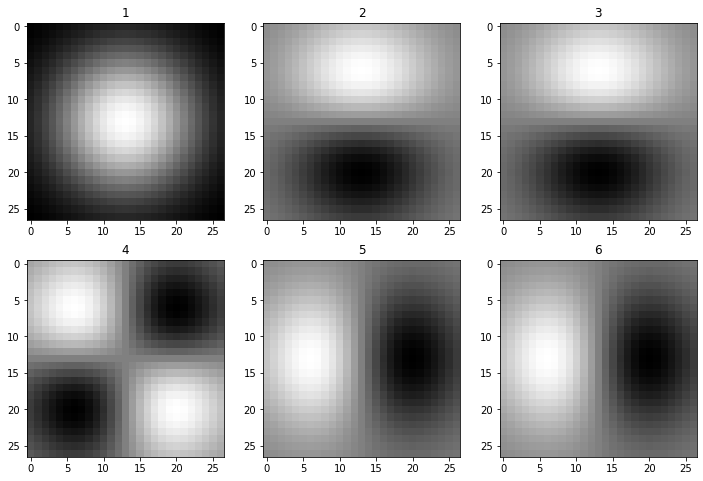

In [2]:
sigma = 7.0
[Gx, x] = gauss_module.gauss(sigma)
[Dx, x] = gauss_module.gaussdx(sigma)

Gx = Gx.reshape(1, Gx.size)
Dx = Dx.reshape(1, Dx.size)

plt.figure(2, figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(conv2(conv2(img_imp, Gx, 'same'), Gx.T, 'same') , cmap='gray')
plt.gca().set_title('1')

plt.subplot(2,3,2)
plt.imshow(conv2(conv2(img_imp, Gx, 'same'), Dx.T, 'same') , cmap='gray')
plt.gca().set_title('2')

plt.subplot(2,3,3)
plt.imshow(conv2(conv2(img_imp, Dx.T, 'same'), Gx, 'same') , cmap='gray')
plt.gca().set_title('3')

plt.subplot(2,3,4)
plt.imshow(conv2(conv2(img_imp, Dx, 'same'), Dx.T, 'same') , cmap='gray')
plt.gca().set_title('4')

plt.subplot(2,3,5)
plt.imshow(conv2(conv2(img_imp, Dx, 'same'), Gx.T, 'same') , cmap='gray')
plt.gca().set_title('5')

plt.subplot(2,3,6)
plt.imshow(conv2(conv2(img_imp, Gx.T, 'same'), Dx, 'same') , cmap='gray')
plt.gca().set_title('6')

plt.show()

1. The result is given by applying the gaussian filter first horizontally and after vertically in two sequential 1D convolutions, which is equivalent to a 2D convolution of a gaussian filter thanks to the separability property of such filter. The resulting image can be understood considering that the white spot has a higher weight when the convolutional patch is centered on pixels nearby it. The symmetry of the gaussian filter directly translates into the symmetry of the image.
2. In this case the gaussian filter slides over the x axis, affecting the smoothing process with respect to the y axis, consistent with what we would expect from such a filter. Then we apply the first derivative filter, with the effect of obtaining an edge detection along the vertical direction.
3. This image is the equivalent to the previous one due to the commutative property of the convolution.
4. In the original image we have 4 transitions from white to black, determining the edges. Applying the first derivative on both axis, we detect the four transitions by observing two minima and two maxima. The edges are given by the transitions in between the minima and the maxima.
5. and 6. Similarly to the images 2 and 3 we are applying the filters of a gaussian and the first derivative, but with the inverted axis, obtaining the same result rotated and detecting the vertical edges.

# Question 1e

**Apply the method gaussderiv to the provided example images graf.png and gantrycrane.png and comment on the
output in your report. Consider also why smoothing an image is important before applying the derivative
filter.**

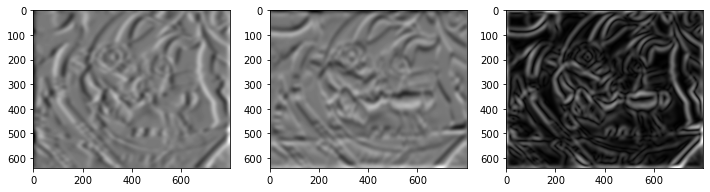

In [3]:
# function gaussderiv (Question 1.e)

img_c = np.array(Image.open('./Filtering/graf.png')).astype('double')
img = rgb2gray(img_c)
[imgDx, imgDy] = gauss_module.gaussderiv(img, 7.0)

plt.figure(8, figsize=(12,8))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
plt.sca(ax1)
plt.imshow(imgDx, cmap='gray')
plt.sca(ax2)
plt.imshow(imgDy, cmap='gray')
plt.sca(ax3)
imgmag = np.sqrt(imgDx**2 + imgDy**2)
plt.imshow(imgmag, cmap='gray')
plt.show()


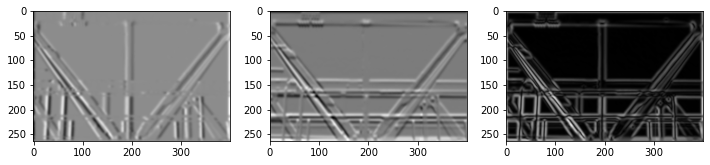

In [4]:
# function gaussderiv (Question 1.e)

img_c = np.array(Image.open('./Filtering/gantrycrane.png')).astype('double')
img = rgb2gray(img_c)
[imgDx, imgDy] = gauss_module.gaussderiv(img, 2.0)

plt.figure(8, figsize=(12,8))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
plt.sca(ax1)
plt.imshow(imgDx, cmap='gray')
plt.sca(ax2)
plt.imshow(imgDy, cmap='gray')
plt.sca(ax3)
imgmag = np.sqrt(imgDx**2 + imgDy**2)
plt.imshow(imgmag, cmap='gray')
plt.show()

What we can observe from the images is that in the first image on the left we always identify the vertical edges while in the second we identify the horizontal edges. A combination of the two is obtained as $f(p_a, p_b) = \sqrt{{p_a}^2 + {p_b}^2}$ where $p_a$ and $p_b$ are corresponding pixels of the two filtered images so that the final result is an elementwise operation.

Smoothing an image is important before applying a derivative filter because it has the effect of blurring the input image by averaging locally, so that the derivative filter marks only the coarse traits of the image. One of the consequences of the gaussian filter is also to average out the noise in the image.

# Question 3c

**Experiment with different functions and numbers of histogram bins, try to find combination that works best.** 

In our case the recognition rate is defined as the ratio between the number of correctly recognized images over the number of all query images.   
We decided to evaluate the best combination of distance functions, hist types and number of bins by performing a grid search over different values. In this case the only numerical hyperparameter we had to tune was the number of bins, in combination with the distances and histograms types. Then our grid is composed by:

* *dist_list*: chi square, l2, intersect
* *hist_list*: grayvalue, rgb, rg, dxdy
* *num_bins*: 5, 10, 15, 30, 50

Since we have 60 possible combinations to be evaluated, we used multiprocessing programming in order to speed up the procedure by spreading the workflow over all the available processors. In the table below we present the best 10 results sorted according to the recognition rate:

In [5]:
display(pd.read_csv('./Identification/grid_search.csv').sort_values(by=['recog_rate'], ascending=False).head(10))

,dist_type,hist_type,num_bins,correct,recog_rate
27,chi2,rgb,15,82,0.921348
3,intersect,rgb,15,81,0.910112
38,chi2,rgb,5,79,0.887640
22,chi2,rg,15,79,0.887640
39,intersect,rg,15,75,0.842697
11,chi2,rg,5,73,0.820225
33,chi2,rgb,10,72,0.808989
13,intersect,rgb,5,72,0.808989
21,chi2,rgb,30,72,0.808989
0,intersect,rgb,30,71,0.797753


As we expected, we observe that the l2 norm does not appear in the top ten results, since its performance is quite poor with respect to the other two, accordingly with what we have seen in theory (low robustness in euclidean distance). A similar thing can be observed also for the histogram types, where we have only rgb and rg in the top ten positions. Concerning the number of bins, it seems that a number in between 5 and 15 it is enough, even if results with number of bins equal to 30 appears in the 9th and 10th positions.

*Note: In case you want to try the code of the grid search with the multiprocessing computation, Unix-based systems are more suitable with the packages. We found the multiprocessing package of python in Windows buggy.*

# Question 4b

**Plot RPC curves for different histogram types, distances and number of bins. Submit a summary of your
observations as part of your solution.**

The recall (or sensitivity) values indicates the true positive rate, the number of true positives divided by the sum of the true positives and the false negatives:
$$TPR = \frac{TP}{TP+FN}$$

The value 1-precision is the false discovery rate, the number of false positives over the total number of positive outcomes:
$$FDR = 1-\frac{TP}{TP+FP}$$

We decided to plot 9 different histograms with 5, 10 and 15 numbers of bin, since it appeared to be the best hyperparameter selection according to the grid search applied at the pervious point.
In the Recall Precision Curve we represent sensitivity and precisions at different threshold levels. We used the score values themselves as thresholds.

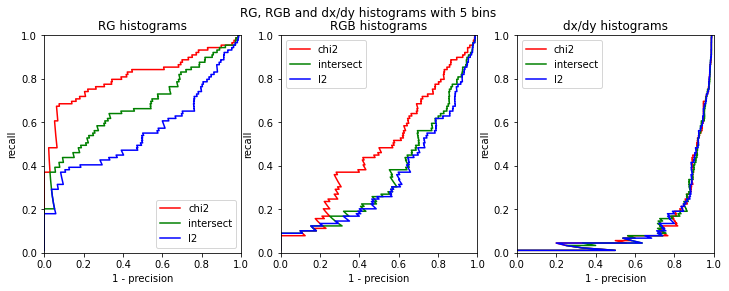

In [6]:
with open('./Identification/model.txt') as fp:
    model_images = fp.readlines()
model_images = ['Identification/'+x.strip() for x in model_images] 

with open('./Identification/query.txt') as fp:
    query_images = fp.readlines()
query_images = ['Identification/'+x.strip() for x in query_images] 


plt.figure(1, figsize=(12,4))

plt.subplot(1,3,1)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', 5, ['r', 'g', 'b'])
plt.title('RG histograms')

plt.subplot(1,3,2)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', 5 // 2, ['r', 'g', 'b'])
plt.title('RGB histograms')


plt.subplot(1,3,3)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', 5, ['r', 'g', 'b'])
plt.title('dx/dy histograms')
plt.suptitle('RG, RGB and dx/dy histograms with 5 bins')
plt.show()


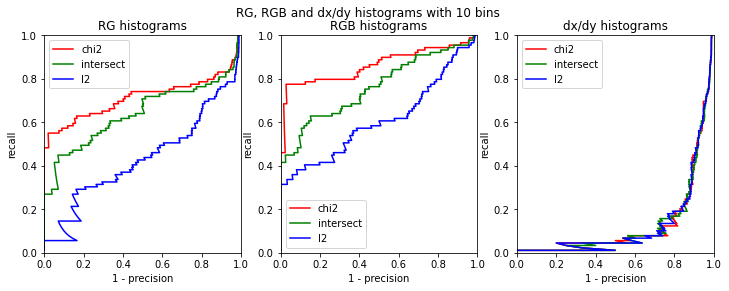

In [7]:
plt.figure(1, figsize=(12,4))
plt.title('10 bins')
plt.subplot(1,3,1)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', 10, ['r', 'g', 'b'])
plt.title('RG histograms')

plt.subplot(1,3,2)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', 10 // 2, ['r', 'g', 'b'])
plt.title('RGB histograms')


plt.subplot(1,3,3)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', 10, ['r', 'g', 'b'])
plt.title('dx/dy histograms')

plt.suptitle('RG, RGB and dx/dy histograms with 10 bins')
plt.show()


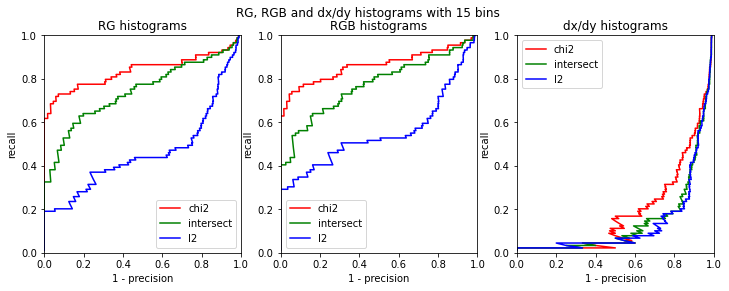

In [8]:
plt.figure(1, figsize=(12,4))
plt.title('15 bins')
plt.subplot(1,3,1)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', 15, ['r', 'g', 'b'])
plt.title('RG histograms')

plt.subplot(1,3,2)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', 15 // 2, ['r', 'g', 'b'])
plt.title('RGB histograms')


plt.subplot(1,3,3)
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', 15, ['r', 'g', 'b'])
plt.title('dx/dy histograms')

plt.suptitle('RG, RGB and dx/dy histograms with 15 bins')
plt.show()


We can notice how there are some improvement by increasing the number of bins.
It seems that the dx/dy histograms perform the worst in all cases (according on what we have seen in point 3c). Moreover we do not get substantial differences in terms of performance by varying the number of bins, apart from chi square, which increases in the 15 bins case. 
In the 10 and 15 bins cases we have slightly better results of RGB with respect than RG. In all the cases chi square performs better than the euclidean and intersect distances.